### Set path to original pyNeuroChem. Please change to your own path

In [1]:
import os
os.environ["ANI_HOME"] = "/home/olexandr/ani/NeuroChem-ANI1"

import sys
sys.path.append('/home/olexandr/notebooks/ASE_ANI')
from ani import ANI, ANIatomic

ImportError: No module named 'ani'

In [2]:
import numpy as np
import  ase
#from ase.build import molecule
from ase.neb import NEB
from ase.calculators.mopac import MOPAC
from ase.optimize import BFGS
from ase.neb import NEBtools
from ase.io import read, write
from ase.neb import NEBTools
import matplotlib
import matplotlib as mpl

import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

In [3]:
# Read the previous configurations
initial = read('data/ethane_dehydro_initial.xyz')
final = read('data/ethane_dehydro_final.xyz')

In [17]:
#  Make 13 images (note the use of copy)
configs = [initial.copy() for i in range(13)] + [final.copy()]

configsM = [initial.copy() for i in range(13)] + [final.copy()]

In [18]:
for config in configs:
    config.set_calculator(ANI())
    
for configM in configsM:
    configM.set_calculator(MOPAC())

In [19]:
# Make the NEB object, interpolate to guess the intermediate steps
neb = NEB(configs, k=5.0)
neb.interpolate()

# Make the NEB object, interpolate to guess the intermediate steps
nebM = NEB(configsM, k=1.0)
nebM.interpolate()

In [20]:
#initial.get_potential_energy()

In [21]:
relax = BFGS(neb, trajectory='neb.traj')
relax.run(fmax=1.9)

      Step     Time          Energy          fmax
BFGS:    0 15:23:11    -2162.577425       16.8537
BFGS:    1 15:23:11    -2162.767881       15.7698
BFGS:    2 15:23:11    -2162.870162       12.6807
BFGS:    3 15:23:11    -2162.978497        6.0161
BFGS:    4 15:23:11    -2163.125052        7.2044
BFGS:    5 15:23:11    -2163.155865       13.9473
BFGS:    6 15:23:12    -2163.165008       10.6368
BFGS:    7 15:23:12    -2163.173335        6.1505
BFGS:    8 15:23:12    -2163.182372        5.4742
BFGS:    9 15:23:12    -2163.187452        4.1209
BFGS:   10 15:23:12    -2163.197856        6.2294
BFGS:   11 15:23:12    -2163.208796        3.7265
BFGS:   12 15:23:12    -2163.217219        7.0165
BFGS:   13 15:23:13    -2163.224680        4.5226
BFGS:   14 15:23:13    -2163.232895        3.9287
BFGS:   15 15:23:13    -2163.246762        4.0936
BFGS:   16 15:23:13    -2163.182397        4.2986
BFGS:   17 15:23:13    -2163.158989        4.4961
BFGS:   18 15:23:13    -2163.143017        4.5044


In [9]:
relaxM = BFGS(nebM, trajectory='nebM.traj')
relaxM.run(fmax=1.0)

      Step     Time          Energy          fmax
BFGS:    0 15:20:13     -319.201160        7.7709
BFGS:    1 15:20:16     -319.759690        7.5817
BFGS:    2 15:20:19     -320.148860        7.4859
BFGS:    3 15:20:22     -320.431990        7.2386
BFGS:    4 15:20:25     -320.689920        6.6847
BFGS:    5 15:20:28     -320.951540        5.9705
BFGS:    6 15:20:31     -321.225330        5.3271
BFGS:    7 15:20:34     -321.529430        4.6073
BFGS:    8 15:20:37     -321.862860        3.8072
BFGS:    9 15:20:39     -322.219960        3.2561
BFGS:   10 15:20:42     -322.562700        2.8628
BFGS:   11 15:20:45     -322.877460        2.4742
BFGS:   12 15:20:48     -323.142460        1.9279
BFGS:   13 15:20:51     -323.347200        1.2303
BFGS:   14 15:20:54     -323.492440        1.0282
BFGS:   15 15:20:57     -323.590730        1.1073
BFGS:   16 15:21:00     -323.678950        1.3088
BFGS:   17 15:21:03     -323.787480        1.3292
BFGS:   18 15:21:05     -323.904240        1.0482


In [22]:
CH1_dist = []
CH2_dist = []
E_rel = []
# Compare intermediate steps to initial energy
initial.set_calculator(ANI())
e0 = initial.get_potential_energy()
for config in configs:
    d1 = config[0].position - config[2].position
    d2 = config[1].position - config[5].position
    CH1_dist.append(np.linalg.norm(d1))
    CH2_dist.append(np.linalg.norm(d2))
    E_rel.append(config.get_potential_energy()- e0)
    #print(np.linalg.norm(d1), config.get_potential_energy() - e0)

In [13]:
CH1_distM = []
CH2_distM = []
E_relM = []
# Compare intermediate steps to initial energy
initial.set_calculator(MOPAC())
e0 = initial.get_potential_energy()
for configM in configsM:
    d1 = configM[0].position - configM[2].position
    d2 = configM[1].position - configM[5].position
    CH1_distM.append(np.linalg.norm(d1))
    CH2_distM.append(np.linalg.norm(d2))
    E_relM.append(configM.get_potential_energy()- e0)

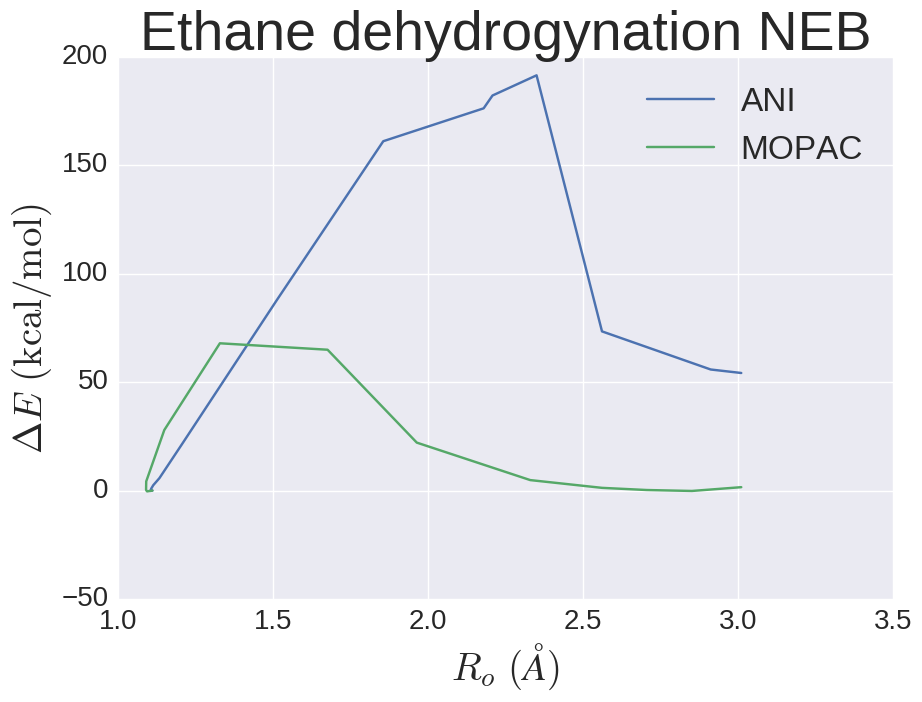

In [33]:
mpl.rcParams['figure.figsize'] = (10.0, 7.0)
plt.plot(CH1_dist, np.array(E_rel)*23.06, label='ANI')
plt.plot(CH1_distM, np.array(E_relM)*23.06,  label='MOPAC')
plt.legend(fontsize=24)
sns.set(font_scale=1.0)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel(r'$ R_{o} \ (\AA)$', fontsize=28)
plt.ylabel(r'$ \Delta E\ \mathrm{(kcal/mol)}$', fontsize=28)

plt.title("Ethane dehydrogynation NEB", fontsize=40)
plt.show()